In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, SpectralClustering

In [2]:
df = pd.read_csv('wb_data.csv')

In [3]:
df = pd.read_csv('wb_data.csv')
df = df[df['num_feedbacks'] > 100]
df = df[~(df['material'].isna() | df['equipment'].isna() | df['description'].isna())]
text_length = []
for i in range(len(df['description'].values)):
    text_length.append(len(df['description'].values[i]))
df['text_length'] = text_length

In [5]:
stop_words = set(stopwords.words('russian') + ['не', 'только', 'так', 'и', 'но', 'но и',
                                               'так и', 'также', 'а также', 'не только'])
lemmatizer = WordNetLemmatizer()

In [6]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    text = list(word for word in text if word not in stop_words)
    return ' '.join(text)
texts['text'] = texts.apply(lambda row: preprocess(row.description), axis=1)

In [8]:
from wordcloud import WordCloud

def draw_wordcloud(texts, max_words=1000, width=1000, height=500):
    wordcloud = WordCloud(background_color='white', max_words=max_words,
                          width=width, height=height)

    joint_texts = ' '.join(list(texts))
    wordcloud.generate(joint_texts)
    return wordcloud.to_image()

In [10]:
vectorizer = TfidfVectorizer(min_df = 200)
X = vectorizer.fit_transform(texts['text'])

model = KMeans(n_clusters = 4)
pred = model.fit_predict(X)

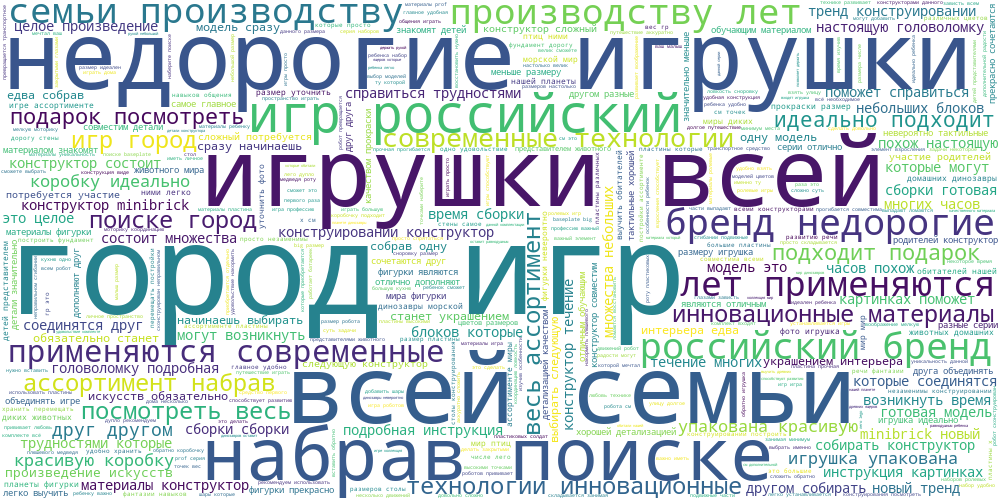

In [11]:
draw_wordcloud(texts[pred == 0].text)

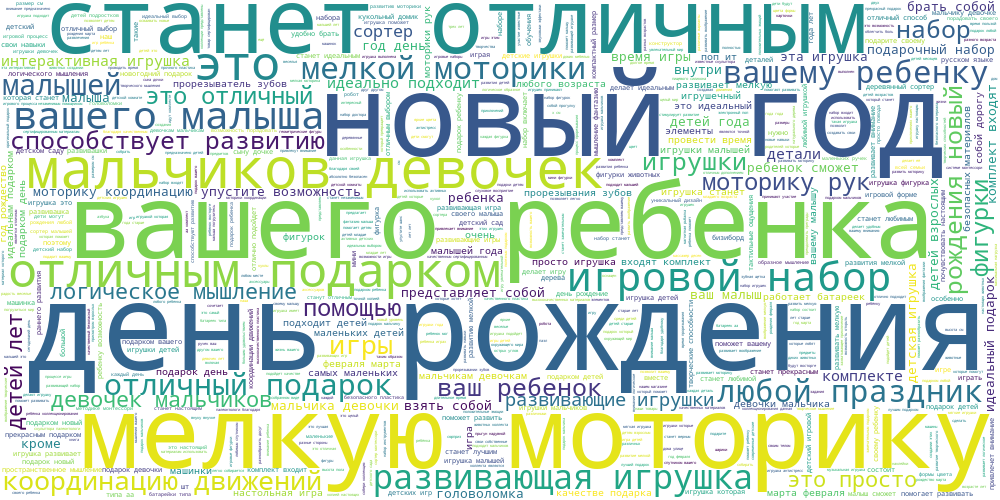

In [12]:
draw_wordcloud(texts[pred == 1].text)

In [13]:
df['cluster'] = pred

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [15]:
sent_dict = pd.read_table('sentdict.txt').T

def get_sentiment(sentence):
    sentence = sentence.split()
    total = 0
    for word in sentence:
        if word in sent_dict.columns:
            total += sent_dict[word].values[0]
    return total / len(sentence)

df['sentiment'] = texts['text'].apply(get_sentiment)

In [20]:
df.to_csv('df_after_texts.csv')

In [21]:
df.to_csv('df_after_text.csv', index = False, encoding = 'utf-8-sig')

In [2]:
df = pd.read_csv('final_df.csv')
df

,id,name,type,description,is_verified,color,brand,has_video,photo_count,country,...,supplier_rating,item_rating,num_feedbacks,quantity,price,img,text_length,cluster,sentiment,rating
0,251773651,Грызунок пульт для зубов,Прорезыватели,СУПЕР НОВИНКА!!! Теперь можно больше не прятат...,True,черный,KIDSLAB,True,16,Китай,...,4.9,4.9,49270,2469,25500,https://basket-16.wbbasket.ru/vol2517/part2517...,1119,1,0.074952,0.0
1,90705358,Мягкая игрушка Сяо геншин импакт,Мягкие игрушки,Мягкая игрушка Геншин Импакт! Игрушки выполнен...,False,синий,Плюшевый друг,False,1,Китай,...,4.8,4.8,2918,9,46800,https://basket-05.wbbasket.ru/vol907/part90705...,511,2,0.017000,0.0
2,73090209,Мягкая игрушка Ворон Бравл Старз,Мягкие игрушки,Мягкие игрушки выполнены в виде персонажей из ...,False,черный,LoveBeary,False,1,Китай,...,4.8,4.7,2548,18,46800,https://basket-05.wbbasket.ru/vol730/part73090...,934,1,0.028663,0.0
3,43079352,"Червячки деревянные, сортер для малышей магнит...",Сортеры,Дополнительный набор из 10 червячков для магни...,True,"зеленый, красный, голубой, оранжевый, желтый",Danila.toys,True,6,Китай,...,4.9,4.9,4014,2162,17100,https://basket-03.wbbasket.ru/vol430/part43079...,816,1,0.065792,0.0
4,217742416,Силиконовый прорезыватель грызунок пульт для з...,Прорезыватели,Силиконовый прорезыватель-пульт от для малышей...,False,глубокий черный,LIN FACTORY,False,13,NaN,...,4.8,4.9,2267,586,26100,https://basket-14.wbbasket.ru/vol2177/part2177...,2000,1,0.034376,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,72078711,"Игровой набор ""Лето на даче""",Головоломки,"Игровой набор представлен в 6-ти вариантах: ""П...",True,NaN,Крона,True,9,Россия,...,4.8,5.0,821,709,61800,https://basket-05.wbbasket.ru/vol720/part72078...,1025,1,0.019000,0.0
5132,164443245,Among Us мини фигурки 1 шт во флоупаке,Фигурки-игрушки,Мини-фигурки Амонг Ас - идеальный подарок для ...,True,"красный, желтый, синий",Among us,True,8,Китай,...,4.8,4.7,956,845,28500,https://basket-11.wbbasket.ru/vol1644/part1644...,1810,1,0.036136,0.0
5133,138787230,"Картонный домик раскраска, большой развивающий...",Домики для детей,Картонный игровой развивающий Домик-раскраска ...,True,NaN,Brauberg,True,21,Россия,...,4.9,4.8,4046,439,157700,https://basket-10.wbbasket.ru/vol1387/part1387...,1588,1,0.044276,1.0
5134,165234550,Развивающие игрушки книжка шуршалка для новоро...,Книжки-игрушки,Большая развивающая книжка шуршалка с хвостика...,True,"фиолетовый меланж, голубой меланж, пурпурно-кр...",Zeimas,False,19,Китай,...,4.9,4.9,1800,491,66600,https://basket-11.wbbasket.ru/vol1652/part1652...,1180,1,0.017517,0.0
